<h1 style="color:darkred;"> Bosques Aleatorios: ¿Ingreso Alto o Bajo? </h1>
<h2> Horas trabajadas, Años de Estudio, Edad, Tipo trabajo, ...</h2> 


In [1]:
import pandas as pd 

personas = pd.read_csv("ingresos.csv")

print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))



    edad  estudio  genero  tipo_trabajo  horas  ingreso
93    47       15       1             0     40        1
2     34        8       0             0     40        0
27    21       10       1             0     25        0
49    71        9       1             0     45        1
88    24        3       1             0     60        0
..   ...      ...     ...           ...    ...      ...
7     42        9       1             0     40        1
73    50       14       1             1     45        0
33    30        6       1             0     55        0
5     20       10       1             0     40        0
17    67       16       1             0     60        1

[67 rows x 6 columns]
    edad  estudio  genero  tipo_trabajo  horas  ingreso
30    20        9       1             0     40        0
99    47        9       1             0     12        0
29    59       10       0             1     40        0
53    64        5       1             1     40        0
97    46        3       0

<h1 style="color:darkred;"> Aleatoriedad: </h1>
<h1 style="color:darkred;"> Selección de las Características para Divisiones </h1>
<h2 style="color:darkblue;"> >>>>> max_features = √num_características <<<<< </h2>

In [7]:
from random import sample


print(personas.columns[:-1], "\n")
# 1. personas.columns[:-1] -> todas las columnas menos la ultima


print(sample(set(personas[:-1]), 3))



Index(['edad', 'estudio', 'genero', 'tipo_trabajo', 'horas'], dtype='object') 

['genero', 'tipo_trabajo', 'estudio']


C:\Users\javie\AppData\Local\Temp\ipykernel_23384\1865384245.py:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  print(sample(set(personas.columns[:-1]), 3))


<h1 style="color:darkred;"> Creación de Bosque Aleatorio (Random Forest) </h1>

In [5]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators: número de árboles
# criterion: criterio de división
# max_features: número de características a considerar en cada división
# bootstrap: si se usa muestreo con reemplazo
# max_samples: número de muestras a considerar en cada árbol
# oob_score: si se usa muestreo con reemplazo
bosque = RandomForestClassifier(n_estimators=100,
                               criterion="gini",
                               max_features="sqrt",
                               bootstrap=True,
                               max_samples=2/3,
                               oob_score=True)

bosque.fit(personas[personas.columns[:-1]].values, personas["ingreso"].values)

print(bosque.predict([[50, 16, 1, 1, 40]]))
print(bosque.score(personas[personas.columns[:-1]].values, personas["ingreso"].values))
print(bosque.oob_score_)



[1]
0.99
0.74


<h1 style="color:darkred;"> Visualización del Bosque Aleatorio</h1>

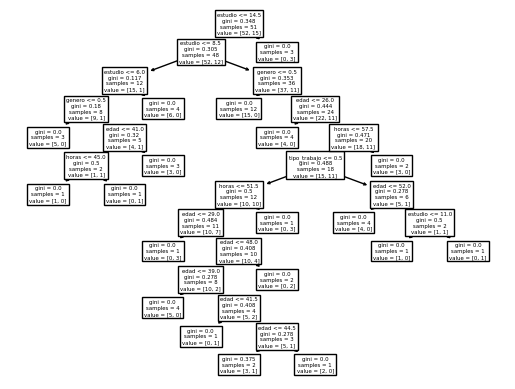

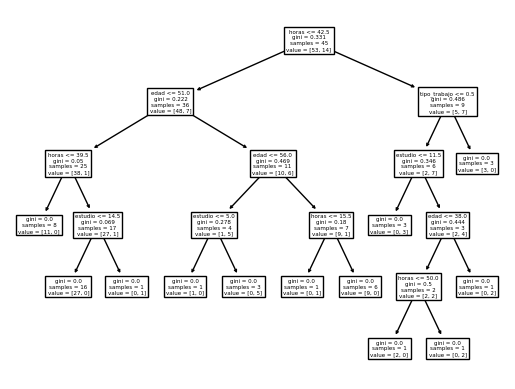

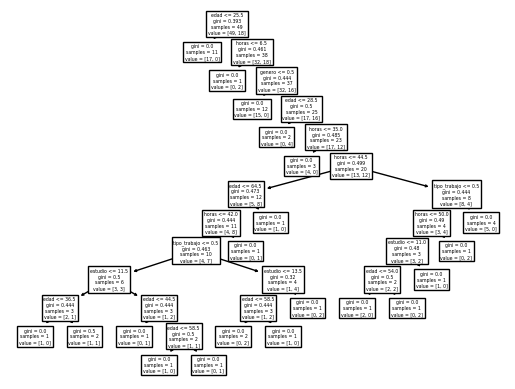

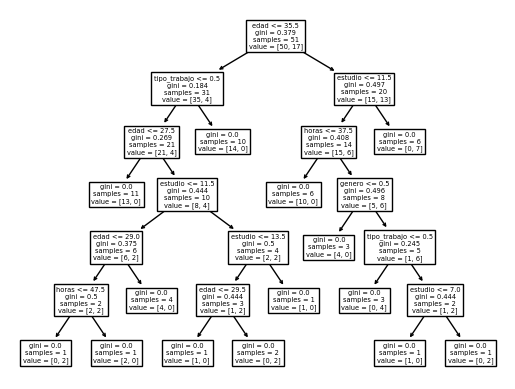

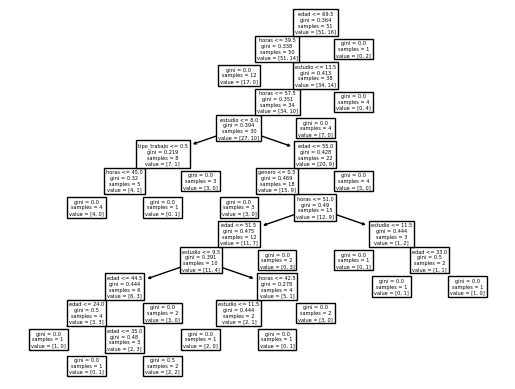

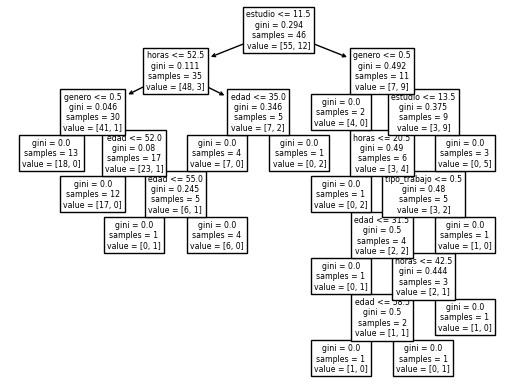

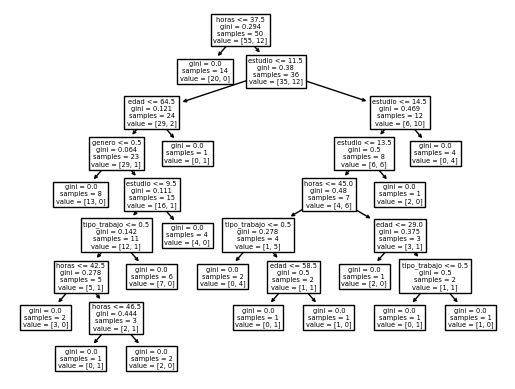

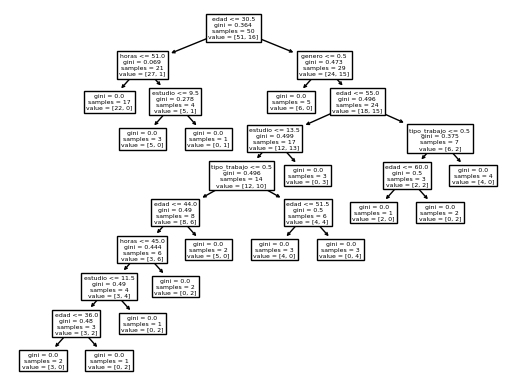

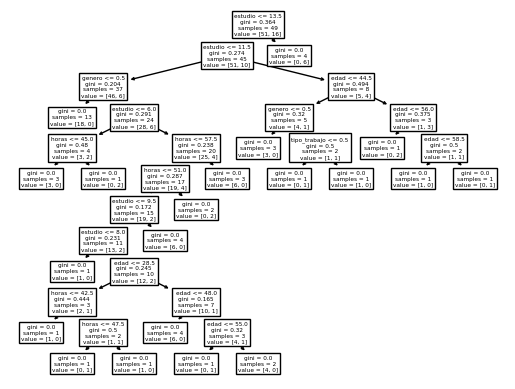

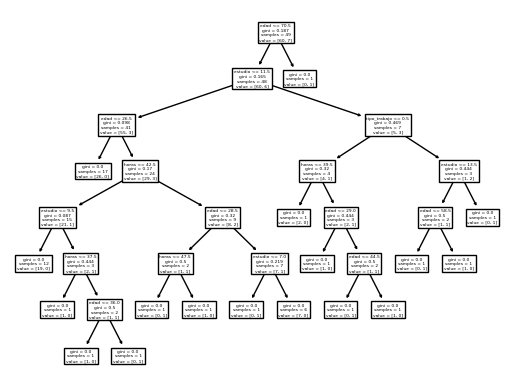

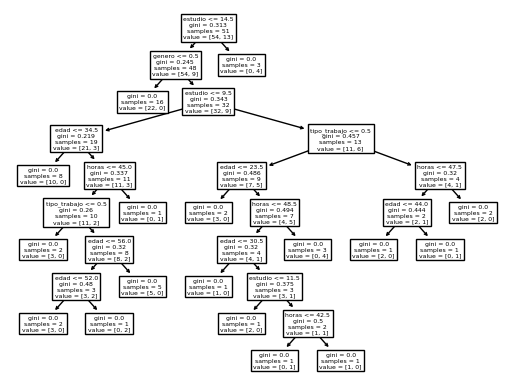

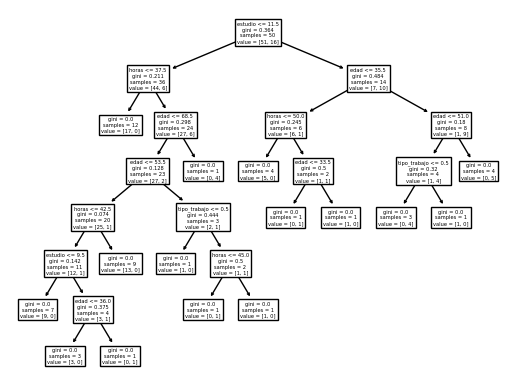

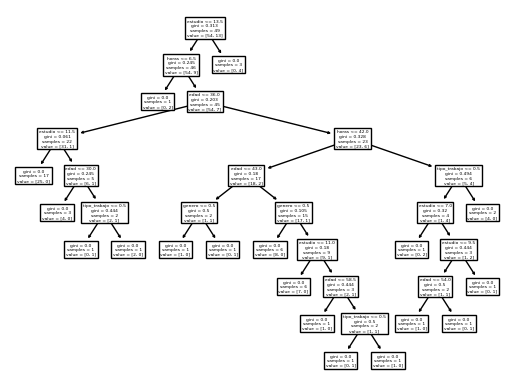

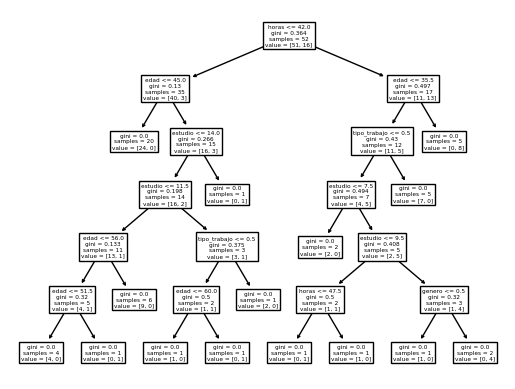

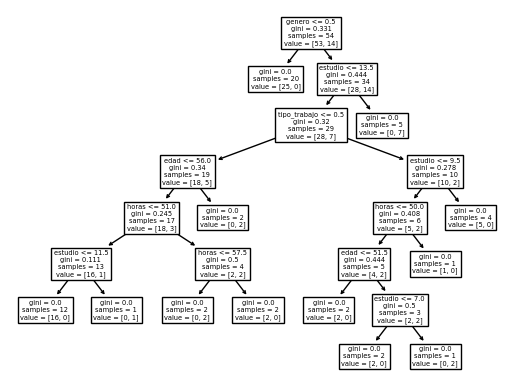

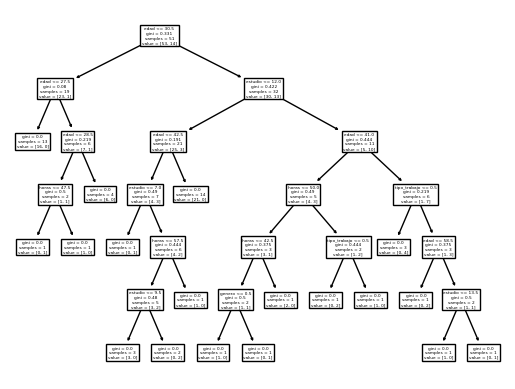

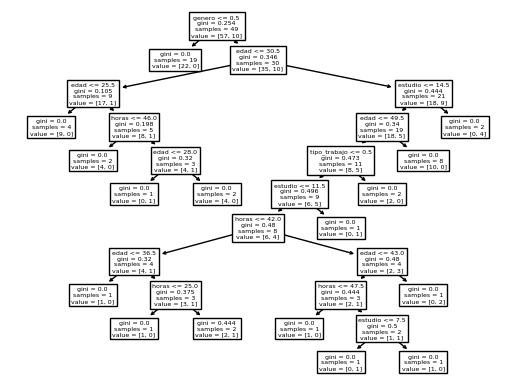

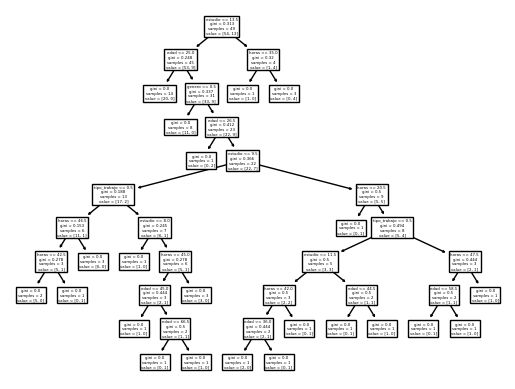

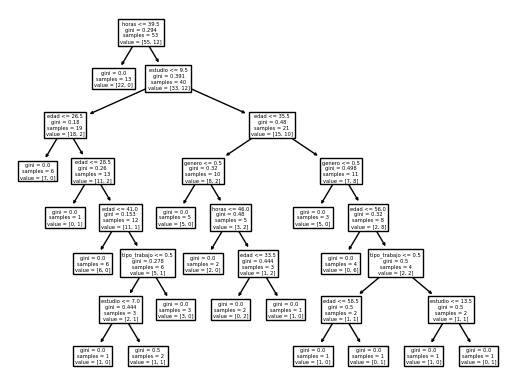

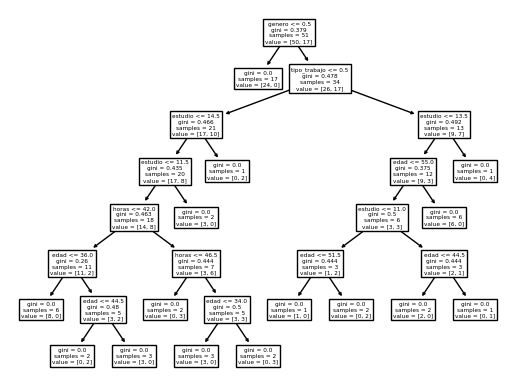

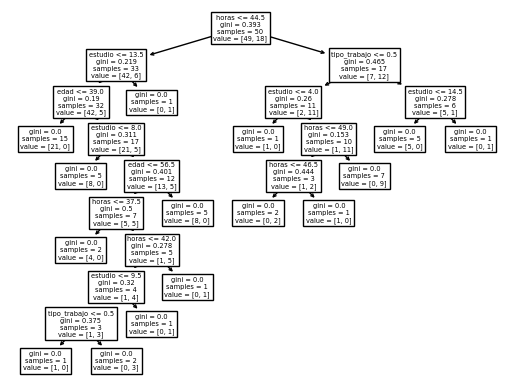

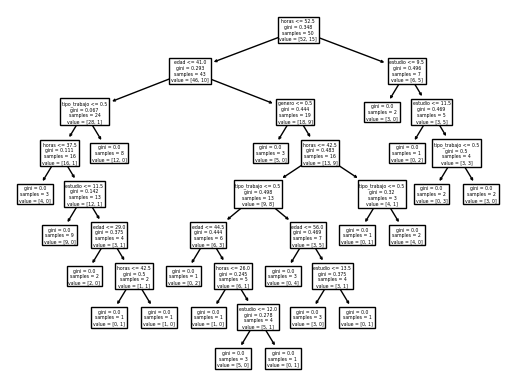

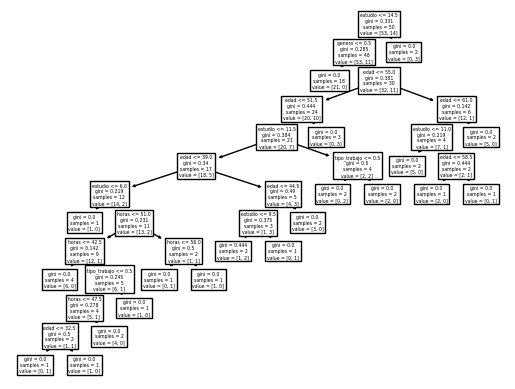

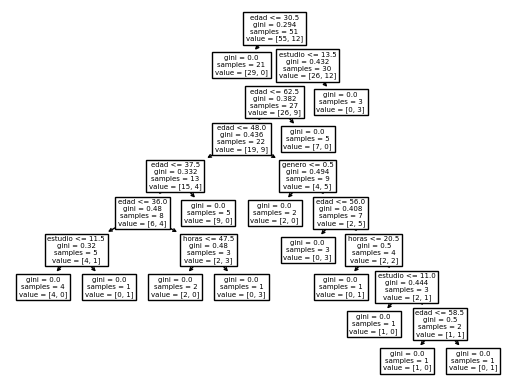

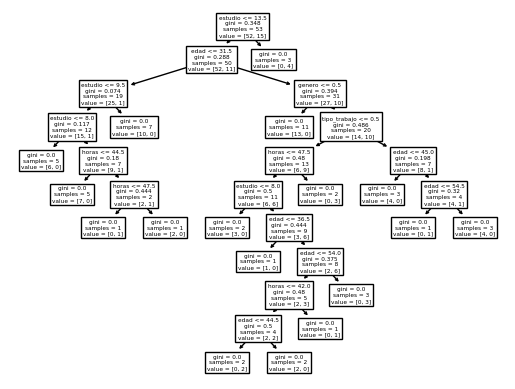

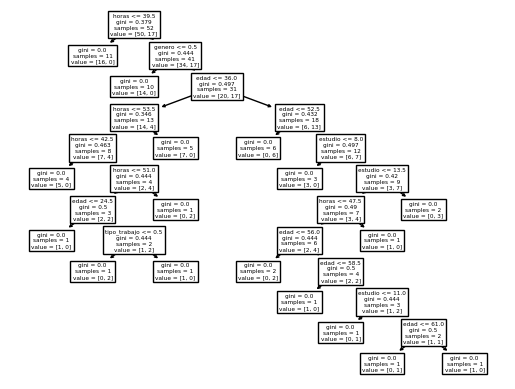

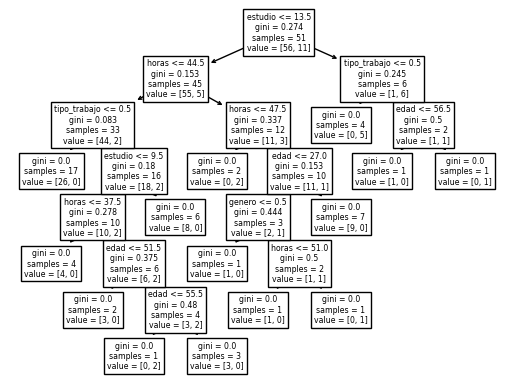

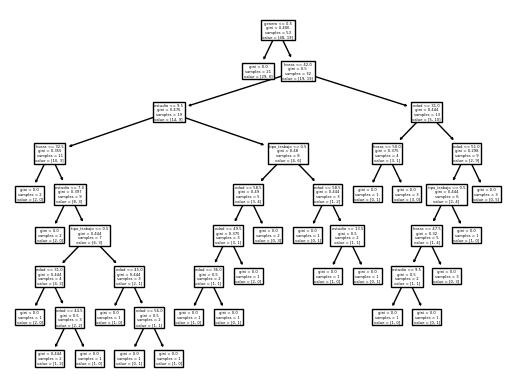

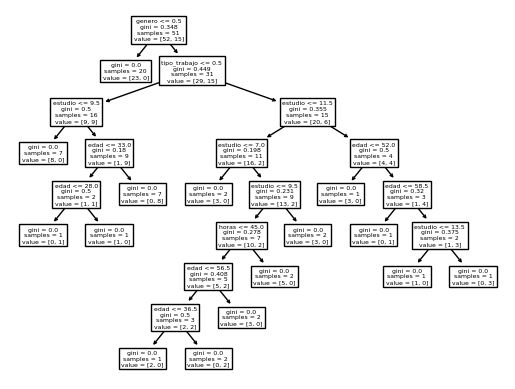

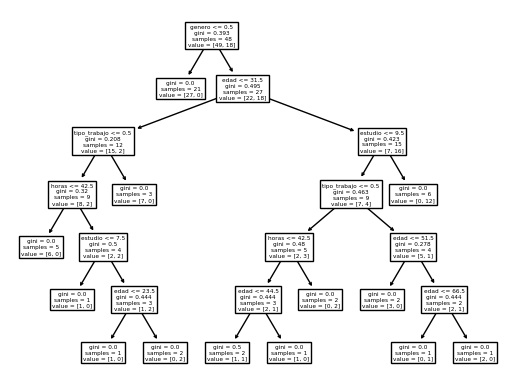

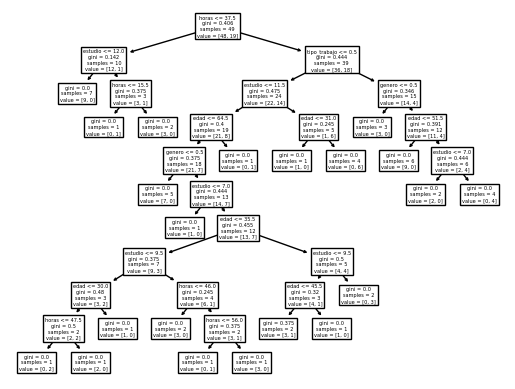

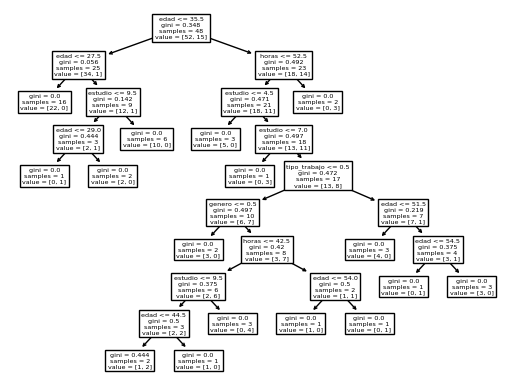

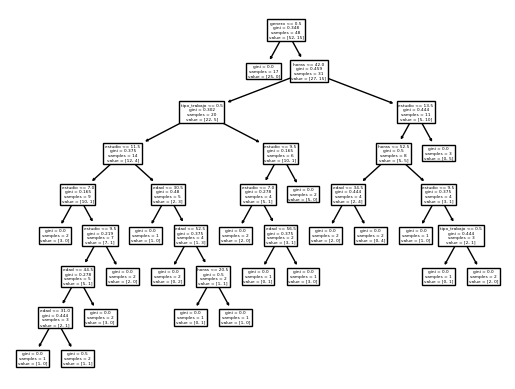

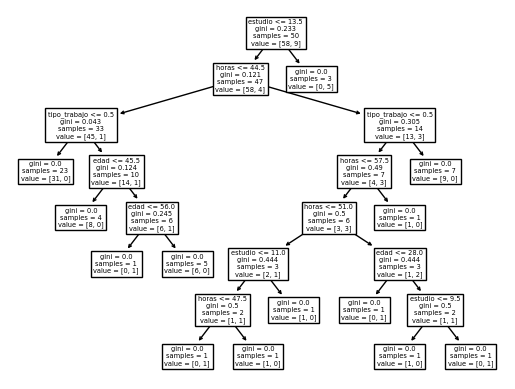

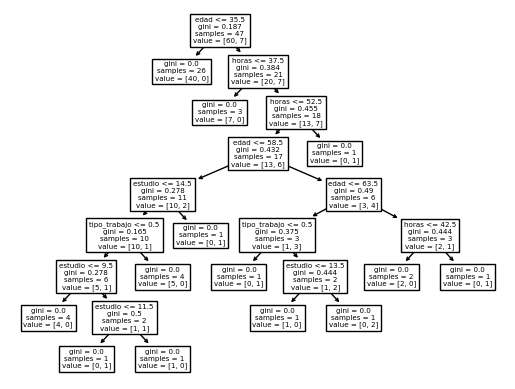

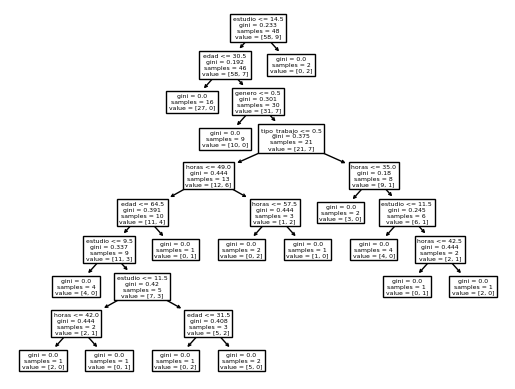

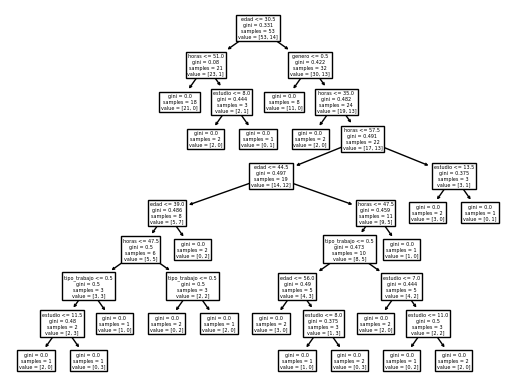

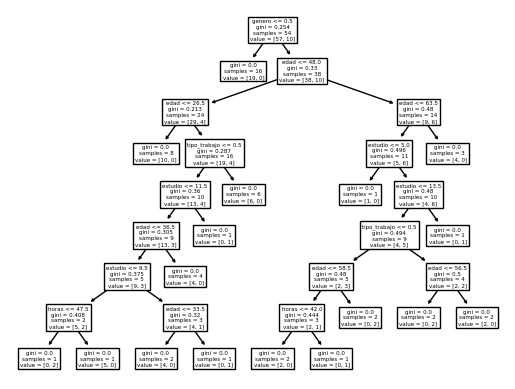

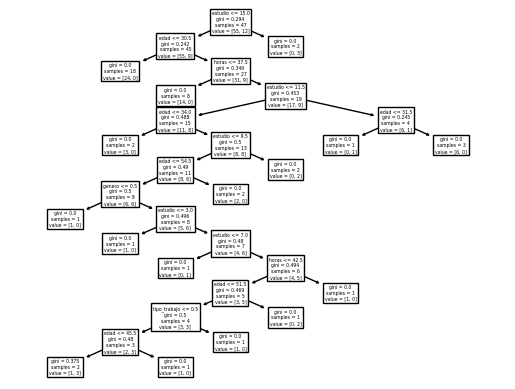

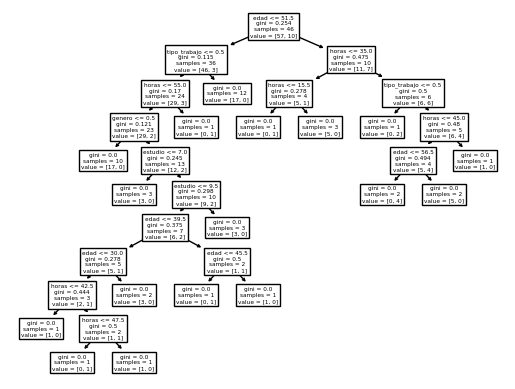

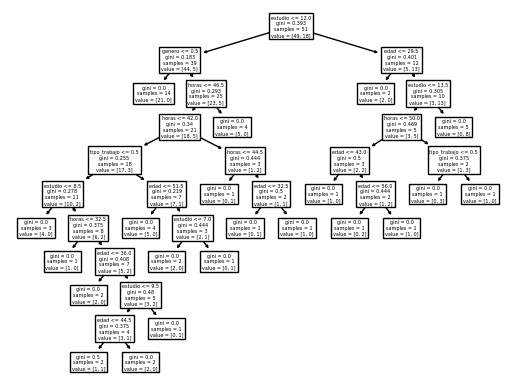

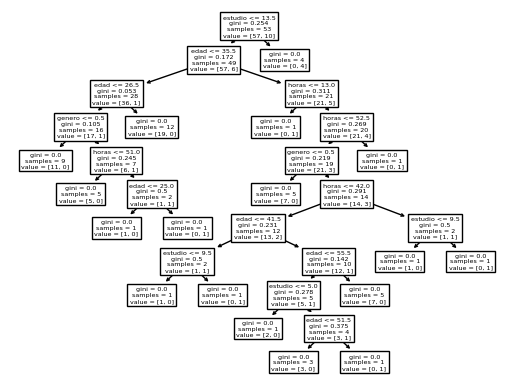

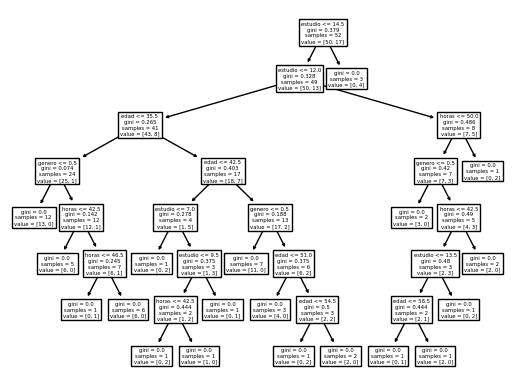

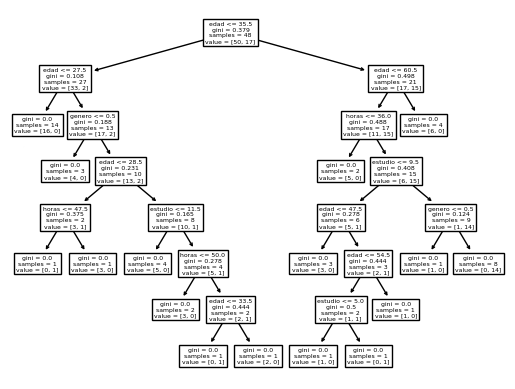

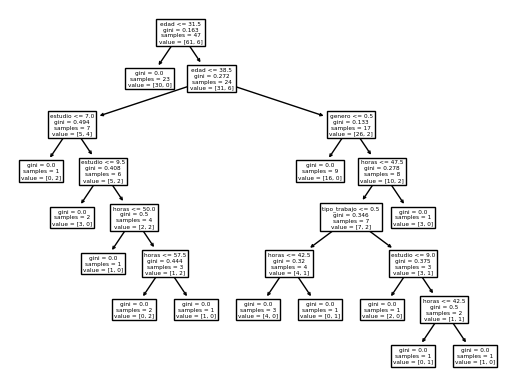

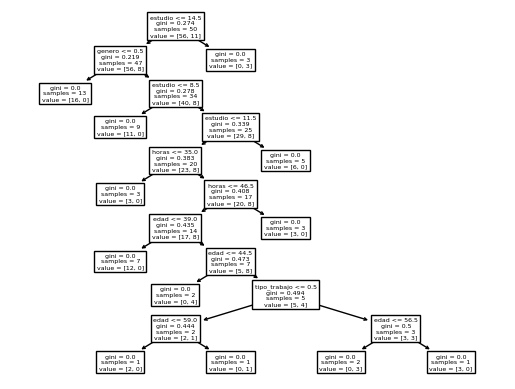

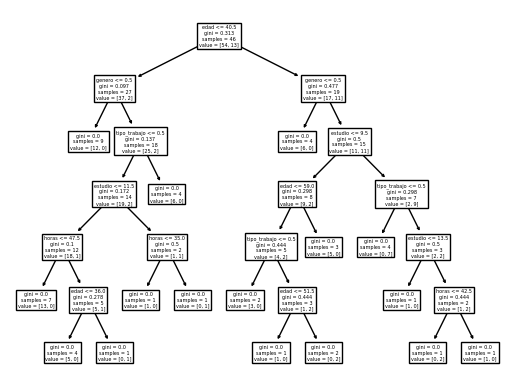

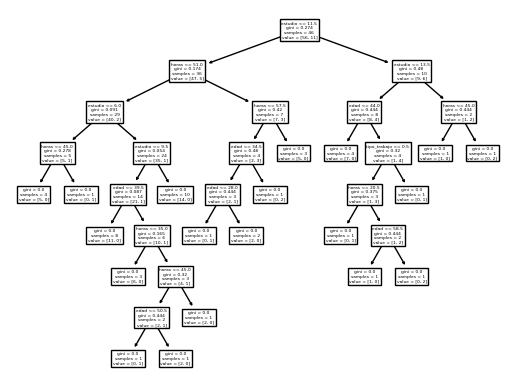

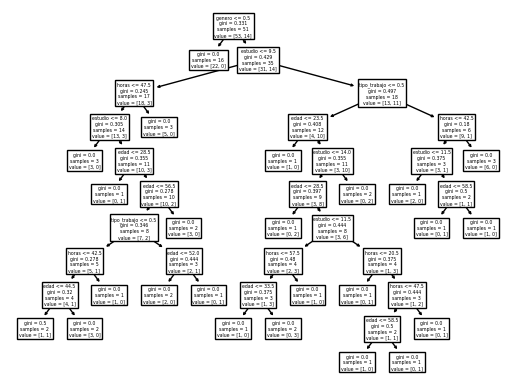

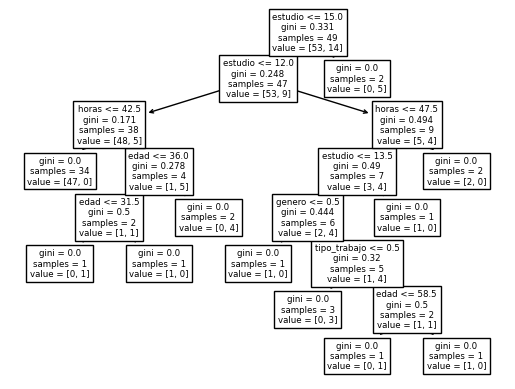

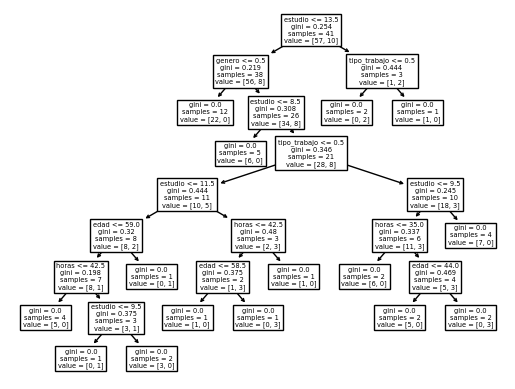

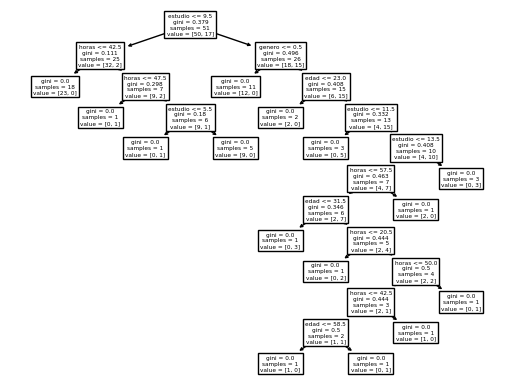

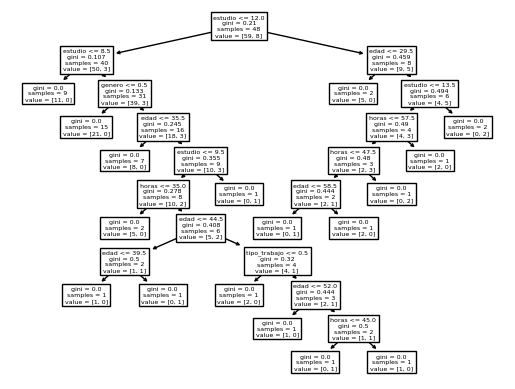

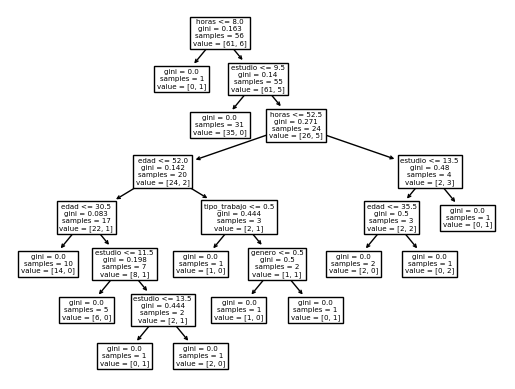

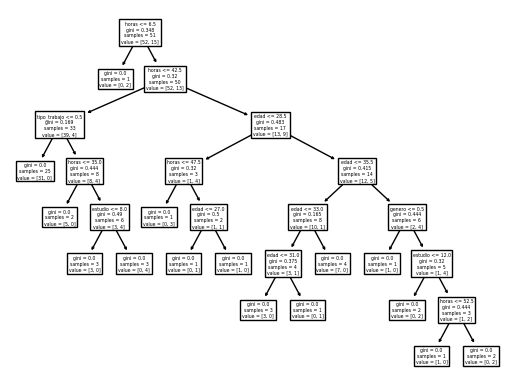

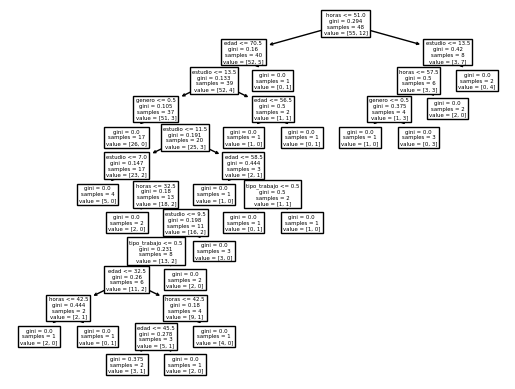

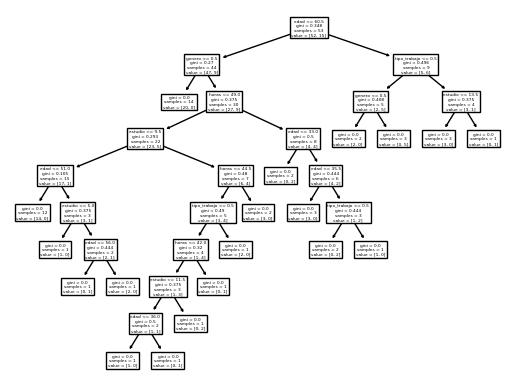

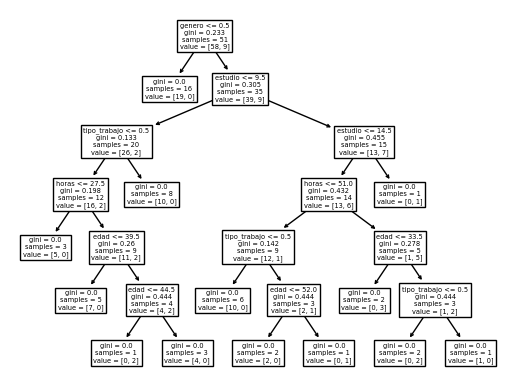

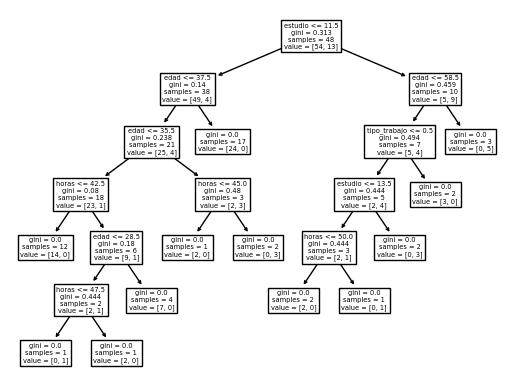

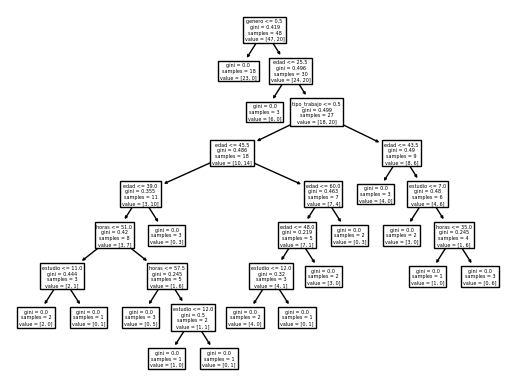

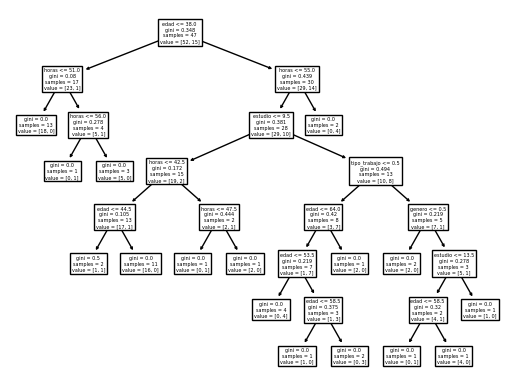

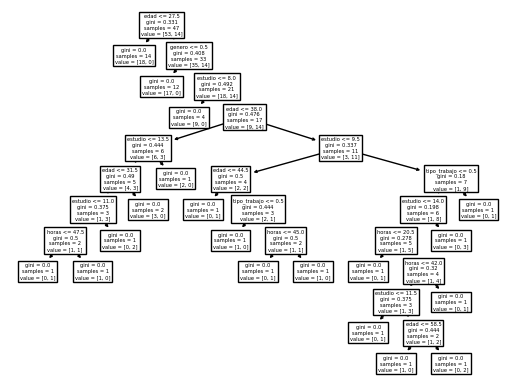

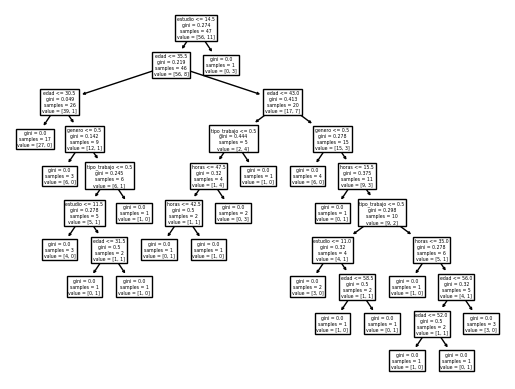

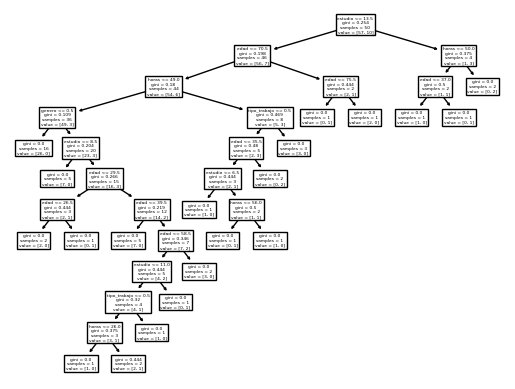

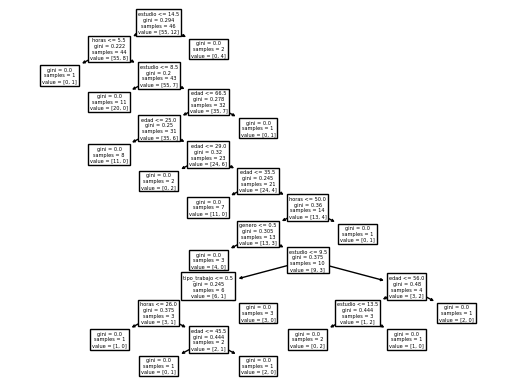

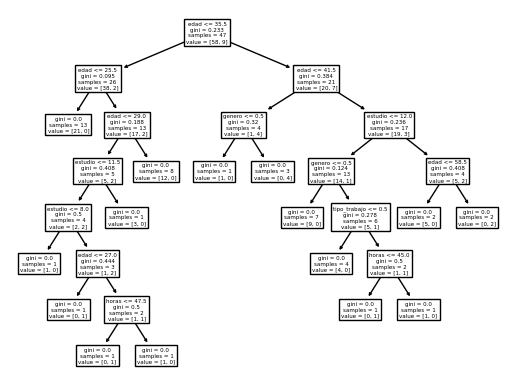

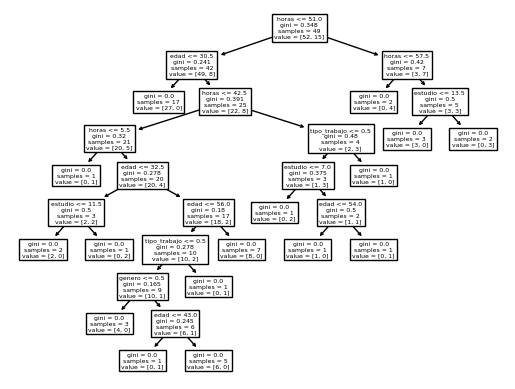

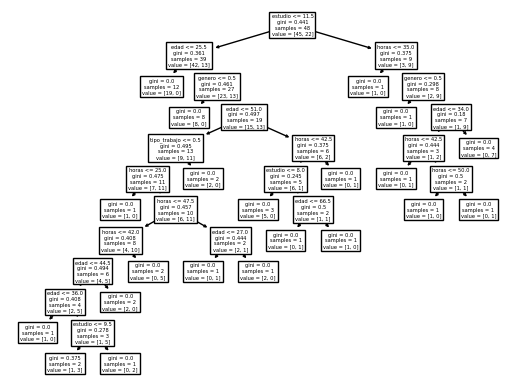

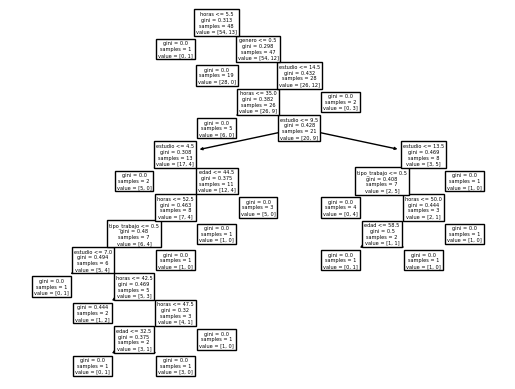

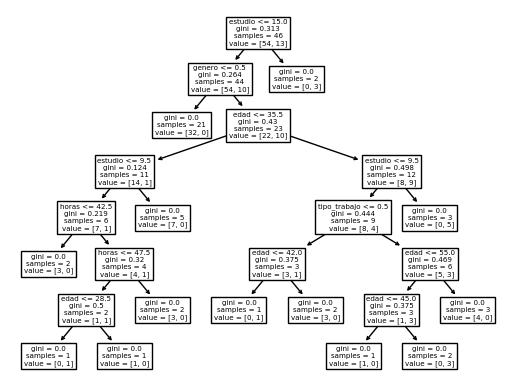

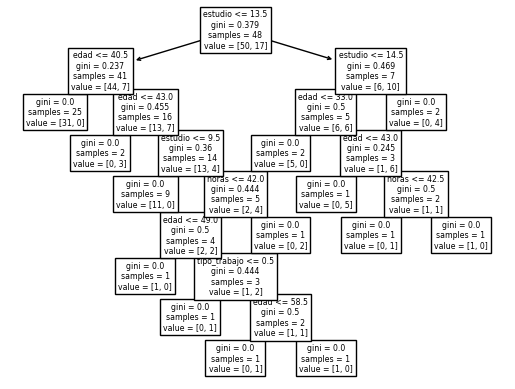

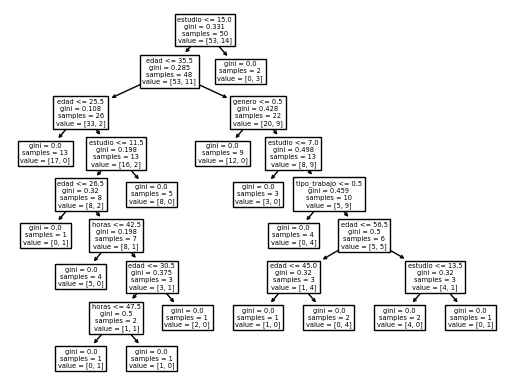

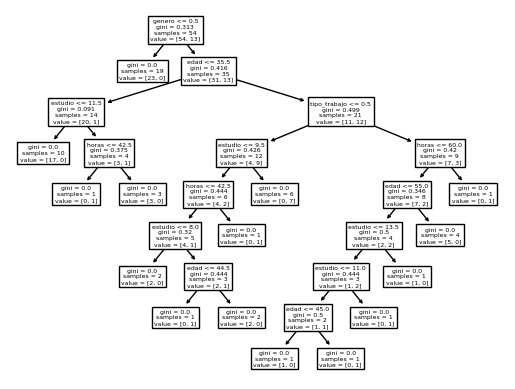

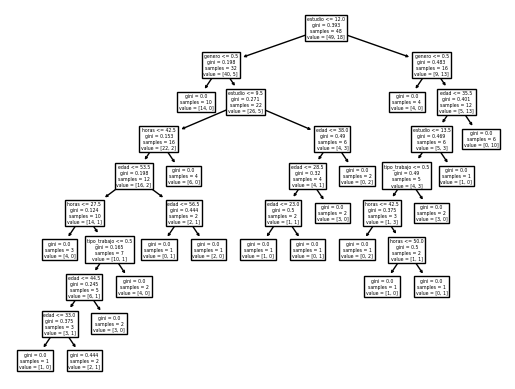

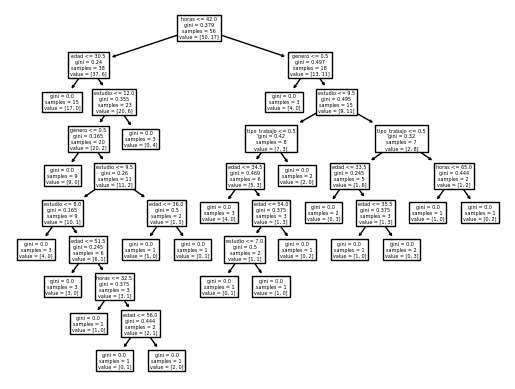

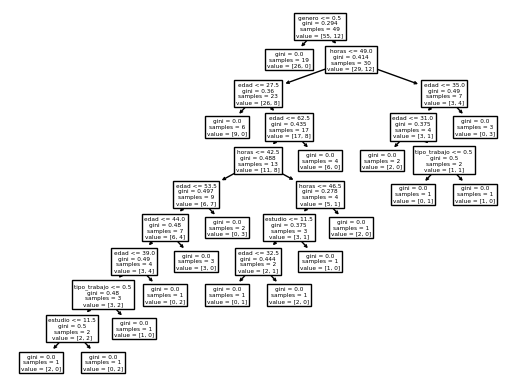

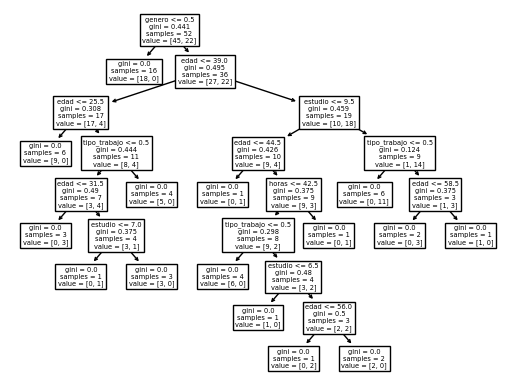

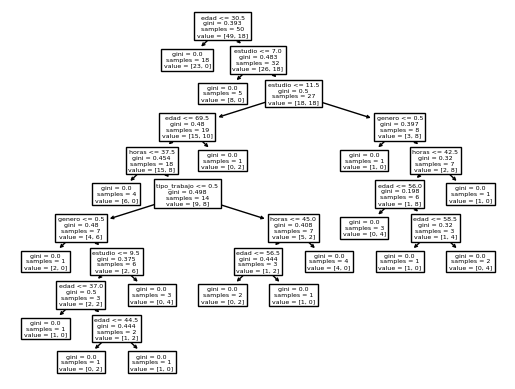

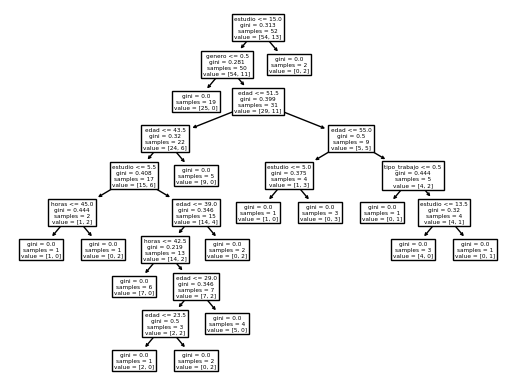

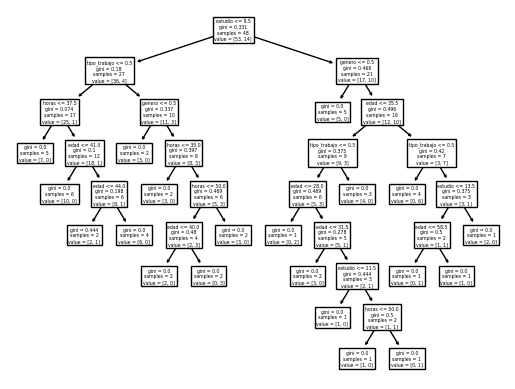

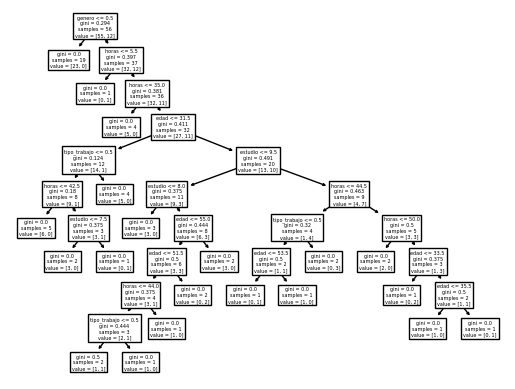

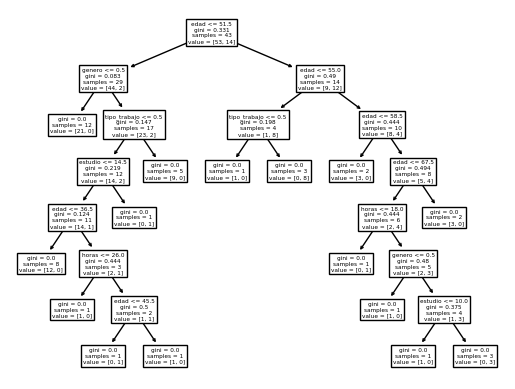

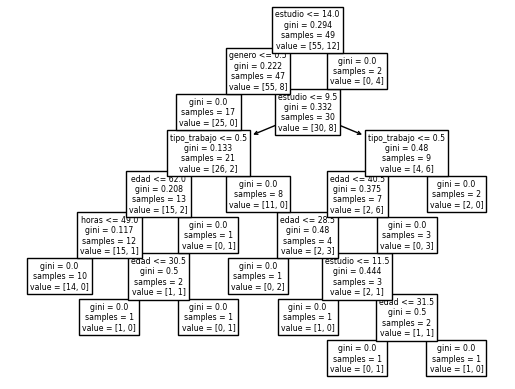

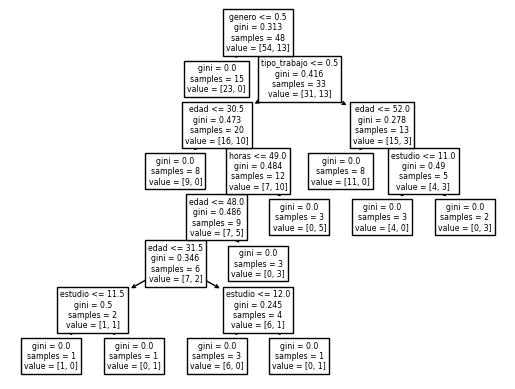

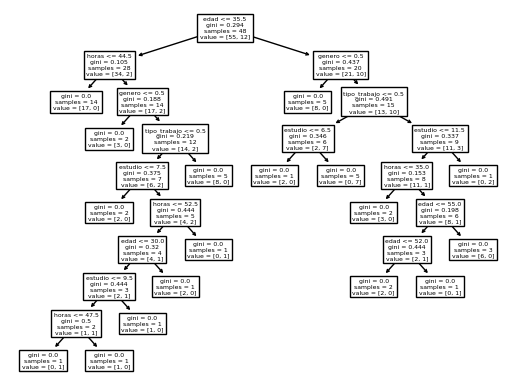

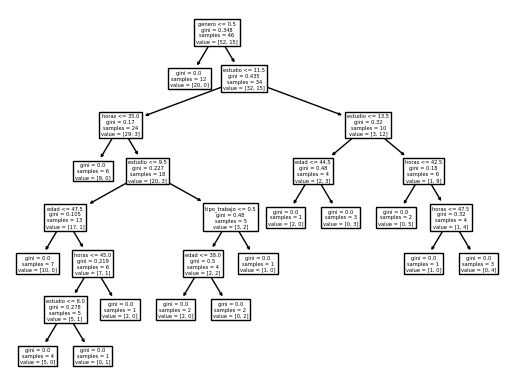

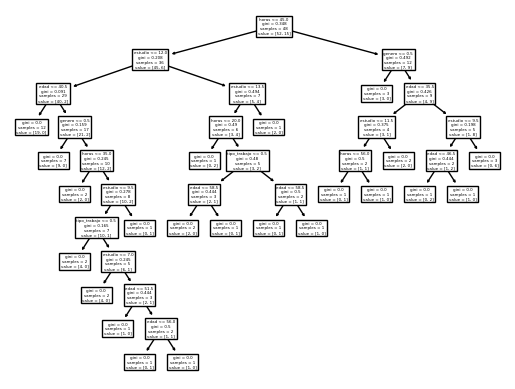

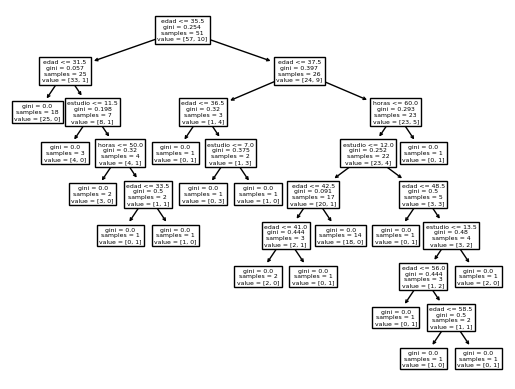

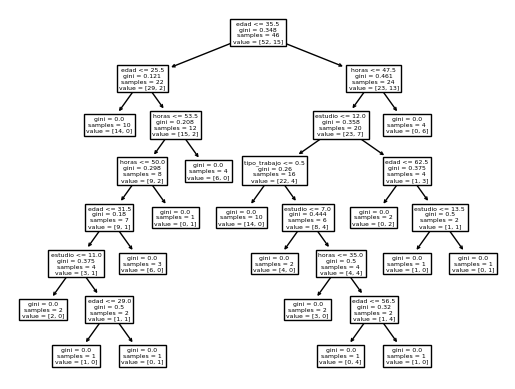

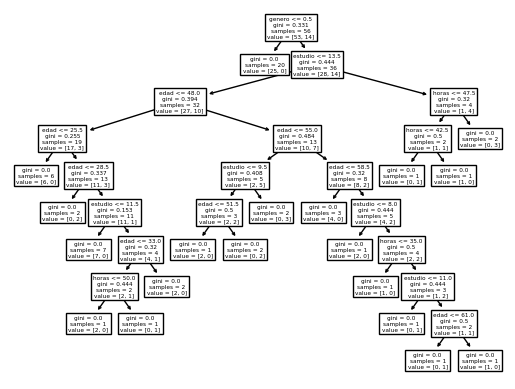

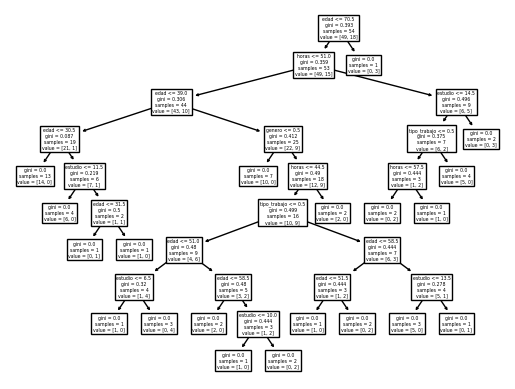

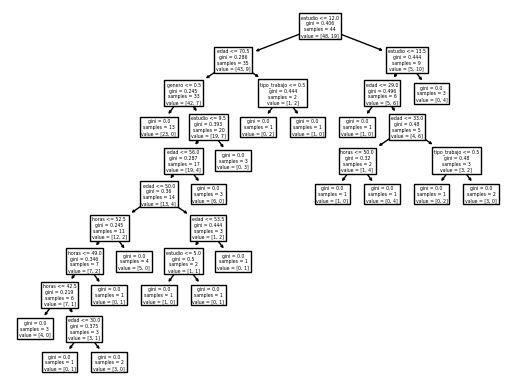

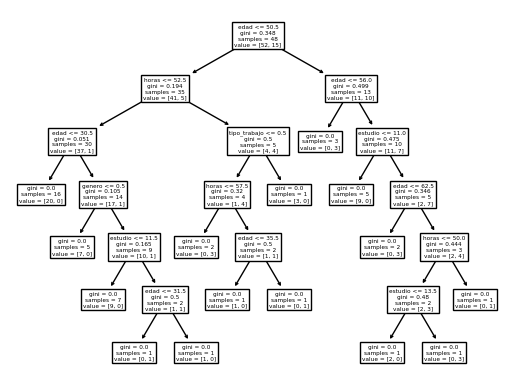

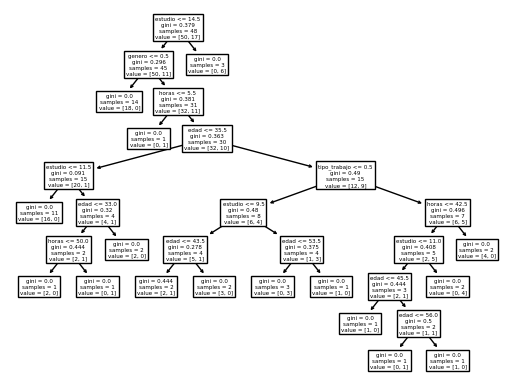

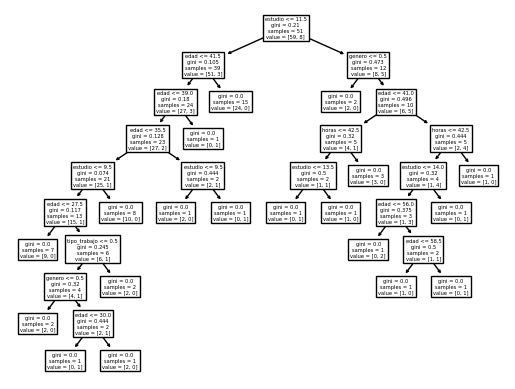

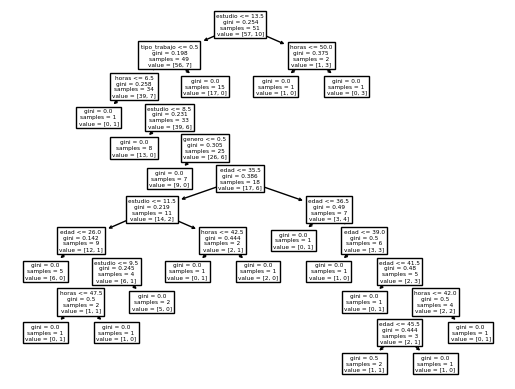

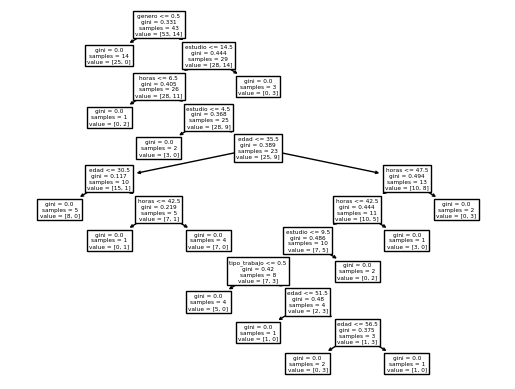

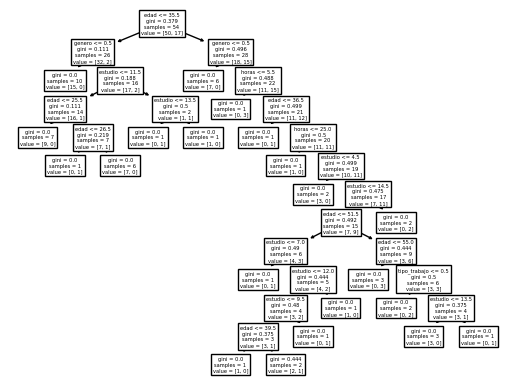

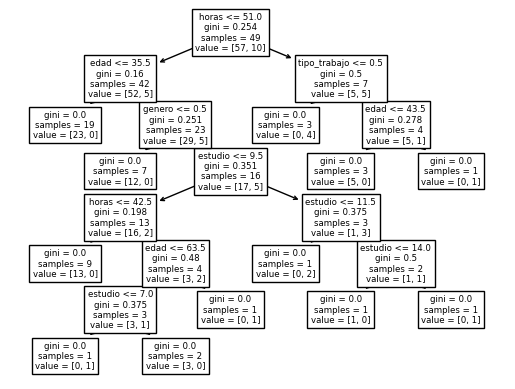

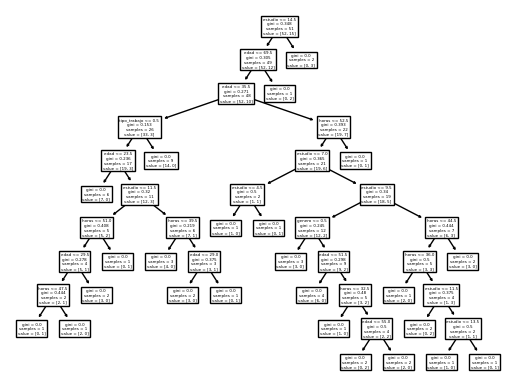

In [6]:
import matplotlib.pyplot as plt
from sklearn import tree

for arbol in bosque.estimators_:
    tree.plot_tree(arbol, feature_names=personas.columns[:-1])
    plt.show()
    
    


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

# Referencia

## Breiman, "Random Forests", Machine Learning, 45(1), 5-32, 2001.

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>